In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
matplotlib.rcParams['figure.autolayout'] = True
plt.rcParams.update({'font.size': 18})

import warnings
warnings.filterwarnings('ignore')

import torch
from sklearn.model_selection import train_test_split

from utils import NS_datasets, NS_load, count_params, plot_curves
from Dataset import AE_dataset, Dynamics_dataset
from ModelClass import ModelClass

Device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device is', Device)

Device is cuda


In [2]:
loaded = False
NS_models = sorted([name for name in os.listdir('Results') if name.startswith('NS')])

for i, model_name in enumerate(NS_models):
    print(f'model {i}: {model_name}')

model 0: NS1(1200)_dt1_down4_embed128_layers6_heads8
model 1: NS1(4800)_dt1_down4_embed128_layers6_heads8
model 2: NS2(1200)_dt1_down4_embed128_layers6_heads8
model 3: NS2(4800)_dt1_down4_embed128_layers6_heads8
model 4: NS2(9600)_dt1_down4_embed128_layers6_heads8
model 5: NS3(1200)_dt1_down3_embed128_layers6_heads8
model 6: NS3(1200)_dt1_down3_embed64_layers6_heads8
model 7: NS3(1200)_dt1_down4_embed128_layers6_heads4
model 8: NS3(1200)_dt1_down4_embed128_layers6_heads8
model 9: NS3(1200)_dt1_down4_embed64_layers6_heads8


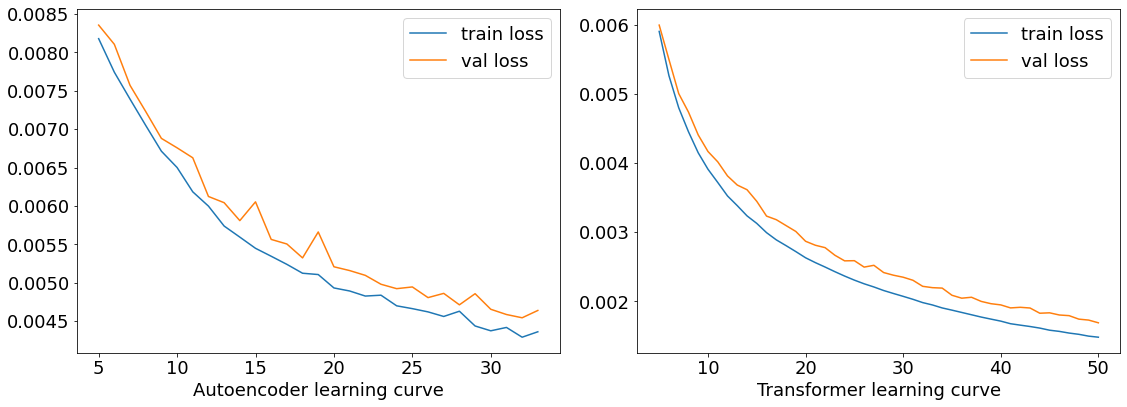

In [14]:
# Select which model you want to use:
model_idx = 9
model_name = NS_models[model_idx]
model = ModelClass(model_name)
model.load_state_dict()
model.AE_test_mode()
model.model_test_mode()
plot_curves(model)

In [ ]:
dataset_idx = int(model_name[2])

Ts = {1:50, 2:30, 3:20}
T = Ts[dataset_idx]

a = model_name.find('dt')
b = model_name.find('_', a)
dt = int(model_name[a+2:b])

a = model_name.find('(')
b = model_name.find(')')
N = int(model_name[a+1:b])

data_array = NS_load(NS_datasets[dataset_idx])[:N, 9:T]
data_array /= max(data_array.max(), -data_array.min())

train_idx, val_idx = train_test_split(np.arange(N), test_size=1/6,
                                          random_state=0)
model.set_AE_dataset(AE_dataset(data_array, train_idx),
                     AE_dataset(data_array, val_idx))
model.set_dynamics_dataset(Dynamics_dataset(data_array, train_idx, dt),
                           Dynamics_dataset(data_array, val_idx, dt))
